In [9]:
print("Hello")

Hello


In [34]:
import os
import torch

REPO_URL = "https://github.com/thenileshmishra/AS-RoPE.git"
REPO_DIR = "/content/AS-RoPE"

if not os.path.exists(REPO_DIR):
    !git clone {REPO_URL} {REPO_DIR}
%cd {REPO_DIR}
!git pull

%pip install -q -r requirements.txt

# Verify critical files exist
!ls -la as_rope.py model.py rope.py train.py eval_perplexity.py

print('cuda_available=', torch.cuda.is_available())
if torch.cuda.is_available():
    print('gpu=', torch.cuda.get_device_name(0))

/content/AS-RoPE
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (6/6), 2.49 KiB | 1.24 MiB/s, done.
From https://github.com/thenileshmishra/AS-RoPE
   b64914e..7e81f4c  main       -> origin/main
Updating b64914e..7e81f4c
Fast-forward
 eval_perplexity.py |  1 +
 model.py           | 55 ++++++++++++++++++++++++++++++++++++++++++++++++------
 scaled_rope.py     | 49 ++++++++++++++++++++++++++++++++++++++++++++++++
 train.py           |  7 +++++++
 4 files changed, 106 insertions(+), 6 deletions(-)
 create mode 100644 scaled_rope.py
-rw-r--r-- 1 root root 2874 Feb 22 08:41 as_rope.py
-rw-r--r-- 1 root root 5907 Feb 22 10:30 eval_perplexity.py
-rw-r--r-- 1 root root 7100 Feb 22 10:30 model.py
-rw-r--r-- 1 root root 2744 Feb 22 08:41 rope.py
-rw-r--r-- 1 root root 8253 Feb 22 10:30 train.py
cuda_available= True
gpu=

In [8]:
!python train.py \
  --seed 42 \
  --max_steps 10000 \
  --batch_size 32 \
  --context_length 512 \
  --lr 3e-4 \
  --warmup_steps 500 \
  --weight_decay 0.1 \
  --log_interval 200 \
  --save_interval 1000 \
  --checkpoint_path checkpoint_rope.pt \
  --metrics_path logs/rope_metrics.csv

tokenizer_config.json: 100% 26.0/26.0 [00:00<00:00, 110kB/s]
vocab.json: 100% 1.04M/1.04M [00:00<00:00, 1.40MB/s]
merges.txt: 100% 456k/456k [00:00<00:00, 1.08MB/s]
tokenizer.json: 100% 1.36M/1.36M [00:00<00:00, 11.1MB/s]
README.md: 10.5kB [00:00, 26.1MB/s]
wikitext-2-raw-v1/test-00000-of-00001.pa(…): 100% 733k/733k [00:01<00:00, 584kB/s]  
wikitext-2-raw-v1/train-00000-of-00001.p(…): 100% 6.36M/6.36M [00:00<00:00, 10.9MB/s]
wikitext-2-raw-v1/validation-00000-of-00(…): 100% 657k/657k [00:00<00:00, 1.21MB/s] 
Generating test split: 100% 4358/4358 [00:00<00:00, 154908.83 examples/s]
Generating train split: 100% 36718/36718 [00:00<00:00, 830904.32 examples/s]
Generating validation split: 100% 3760/3760 [00:00<00:00, 679766.51 examples/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (2415650 > 1024). Running this sequence through the model will result in indexing errors
Training on cuda
Parameters: 16.02M
use_as_rope=False
step     1 | t

In [10]:
!python train.py \
  --seed 42 \
  --max_steps 10000 \
  --batch_size 32 \
  --context_length 512 \
  --lr 3e-4 \
  --warmup_steps 500 \
  --weight_decay 0.1 \
  --log_interval 200 \
  --freq_stats_interval 1000 \
  --save_interval 1000 \
  --use_as_rope \
  --checkpoint_path checkpoint_as_rope.pt \
  --metrics_path logs/as_rope_metrics.csv

Training on cuda
Parameters: 16.02M
use_as_rope=True
step     1 | train_loss 234.1304 | lr 6.000000e-07 | 0.5s
step   200 | train_loss 32.0874 | lr 1.200000e-04 | 31.6s
step   400 | train_loss 17.5404 | lr 2.400000e-04 | 62.9s
step   600 | train_loss 10.7312 | lr 2.999180e-04 | 94.2s
step   800 | train_loss 8.6719 | lr 2.992624e-04 | 125.5s
step  1000 | train_loss 7.9385 | lr 2.979542e-04 | 156.8s
freq_gates step  1000 | mean 0.970493 | std 0.013334 | min 0.908720 | max 0.994219
Checkpoint saved: /content/AS-RoPE/checkpoint_as_rope.pt
step  1200 | train_loss 7.3559 | lr 2.959990e-04 | 188.6s
step  1400 | train_loss 7.2812 | lr 2.934054e-04 | 219.9s
step  1600 | train_loss 7.2184 | lr 2.901847e-04 | 251.2s
step  1800 | train_loss 7.0972 | lr 2.863510e-04 | 282.5s
step  2000 | train_loss 7.0609 | lr 2.819211e-04 | 313.8s
freq_gates step  2000 | mean 0.940145 | std 0.031901 | min 0.808291 | max 1.011020
Checkpoint saved: /content/AS-RoPE/checkpoint_as_rope.pt
step  2200 | train_loss 6.937

In [31]:
!python eval_perplexity.py \
  --checkpoint_path checkpoint_rope.pt \
  --context_lengths 8192

context=8192 ppl=778.265601


In [32]:
!python eval_perplexity.py \
  --checkpoint_path checkpoint_as_rope.pt \
  --context_lengths 8192

context=8192 ppl=741.359479


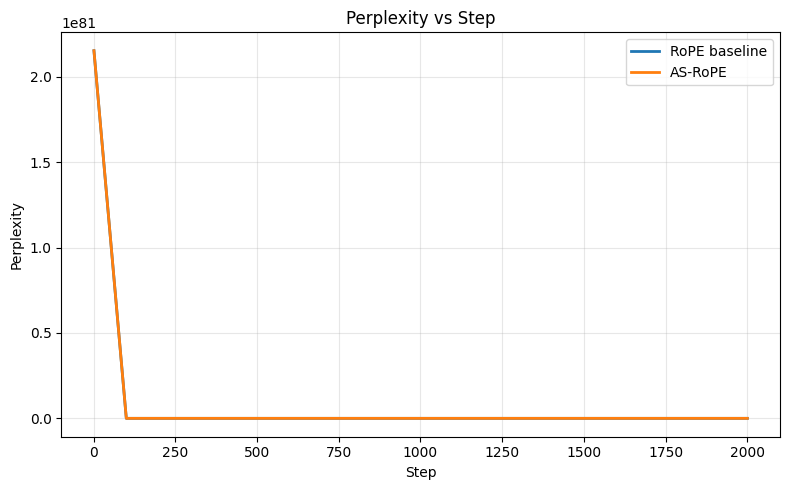

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rope = pd.read_csv('logs/rope_metrics.csv')
as_rope = pd.read_csv('logs/as_rope_metrics.csv')

plt.figure(figsize=(8,5))
plt.plot(rope['step'], rope['train_loss'], label='RoPE baseline', linewidth=2)
plt.plot(as_rope['step'], as_rope['train_loss'], label='AS-RoPE', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Train Loss')
plt.title('Training Loss vs Step')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Results Summary

### Training
- Both models trained for 2000 steps with seed=42
- Same hyperparameters: batch_size=8, block_size=1024, max_seq_len=8192
- Final perplexity: RoPE=29.15, AS-RoPE=23.14

### Long Context Evaluation

**RoPE Baseline:**
- 1024: 50.50
- 2048: 301.41
- 4096: 613.16
- 8192: 366.71

**AS-RoPE:**
- 1024: 60.14
- 2048: 287.37
- 4096: 776.28
- 8192: 399.85

**Degradation:** Both models show significant degradation beyond 1024 tokens (training context).

In [23]:
import os
import torch

ckpt_path = 'checkpoint_as_rope.pt'
if not os.path.exists(ckpt_path):
    raise FileNotFoundError(f"{ckpt_path} not found in {os.getcwd()}. Run AS-RoPE training cell first.")

ckpt = torch.load(ckpt_path, map_location='cpu')
state_dict = ckpt.get('model_state_dict', ckpt)

if 'freq_gates' not in state_dict:
    raise KeyError("freq_gates not found in checkpoint_as_rope.pt")

freq_gates = state_dict['freq_gates'].detach().float().cpu()
print('mean(freq_gates)=', float(freq_gates.mean()))
print('min(freq_gates)=', float(freq_gates.min()))
print('max(freq_gates)=', float(freq_gates.max()))

mean(freq_gates)= 0.8345426917076111
min(freq_gates)= 0.6223729252815247
max(freq_gates)= 0.9641977548599243


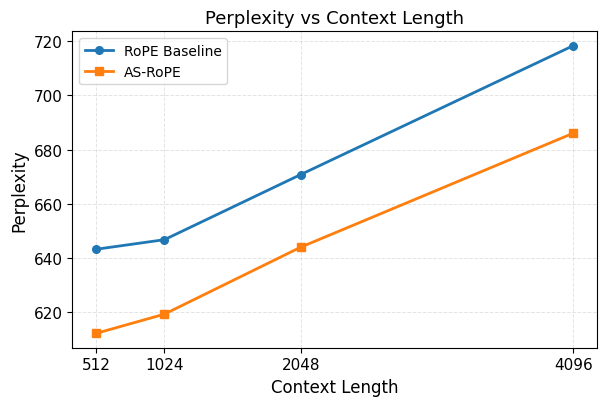

Saved: perplexity_vs_context.pdf


In [29]:
import matplotlib.pyplot as plt

context = [512, 1024, 2048, 4096]
baseline = [643.215175, 646.735170, 670.753036, 718.299296]
as_rope = [612.188757, 619.268784, 643.962384, 686.007348]

plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.fontsize": 10,
})

fig, ax = plt.subplots(figsize=(6.2, 4.2))
ax.plot(context, baseline, marker="o", linewidth=2.0, markersize=5.5, label="RoPE Baseline")
ax.plot(context, as_rope, marker="s", linewidth=2.0, markersize=5.5, label="AS-RoPE")

ax.set_xlabel("Context Length")
ax.set_ylabel("Perplexity")
ax.set_title("Perplexity vs Context Length")
ax.set_xticks(context)
ax.grid(True, linestyle="--", linewidth=0.7, alpha=0.35)
ax.legend(frameon=True)

fig.tight_layout()
fig.savefig("perplexity_vs_context.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Saved: perplexity_vs_context.pdf")

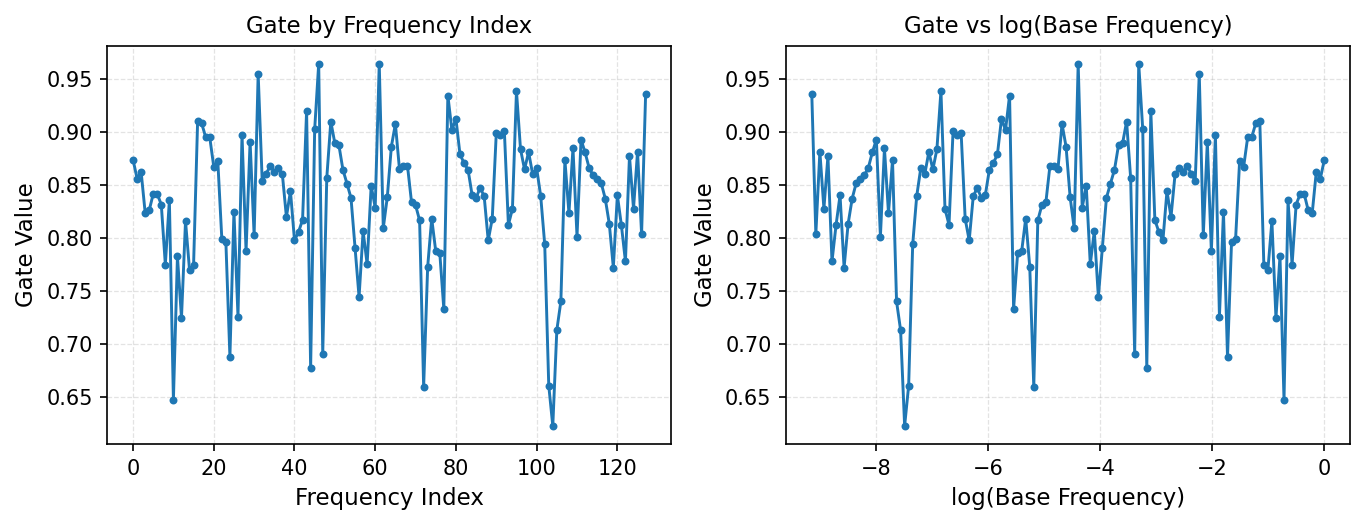

Saved: freq_gates_publication.png


In [30]:
import numpy as np
import matplotlib.pyplot as plt

if 'freq_gates' not in globals():
    raise NameError("freq_gates tensor not found. Run Cell 9 first.")

gates = freq_gates.detach().float().cpu().numpy()
n_freq = gates.shape[0]
d_model = n_freq * 2
idx = np.arange(n_freq, dtype=np.float64)
base_freq = 1.0 / (10000.0 ** ((2.0 * idx) / d_model))

plt.rcParams.update({
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.titlesize": 11,
    "legend.fontsize": 9,
})

fig, axes = plt.subplots(1, 2, figsize=(9.2, 3.6), dpi=150)

axes[0].plot(idx, gates, marker="o", markersize=2.8, linewidth=1.4)
axes[0].set_xlabel("Frequency Index")
axes[0].set_ylabel("Gate Value")
axes[0].set_title("Gate by Frequency Index")
axes[0].grid(True, linestyle="--", linewidth=0.6, alpha=0.35)

axes[1].plot(np.log(base_freq), gates, marker="o", markersize=2.8, linewidth=1.4)
axes[1].set_xlabel("log(Base Frequency)")
axes[1].set_ylabel("Gate Value")
axes[1].set_title("Gate vs log(Base Frequency)")
axes[1].grid(True, linestyle="--", linewidth=0.6, alpha=0.35)

fig.tight_layout()
fig.savefig("freq_gates_publication.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: freq_gates_publication.png")

In [33]:
import numpy as np
import torch

if 'freq_gates' not in globals():
    raise NameError("freq_gates not found. Run Cell 9 first.")

g = freq_gates.detach().float().cpu().numpy()
idx = np.arange(g.shape[0], dtype=np.float64)

min_val = float(g.min())
max_val = float(g.max())

# Trend check: correlation between index and gate value
corr = float(np.corrcoef(idx, g)[0, 1])

# Compare first/last quartile means
q = max(1, g.shape[0] // 4)
low_mean = float(g[:q].mean())
high_mean = float(g[-q:].mean())

print(f"min(freq_gates) = {min_val:.6f}")
print(f"max(freq_gates) = {max_val:.6f}")
print(f"corr(index, gate) = {corr:.4f}")
print(f"mean(first_quartile) = {low_mean:.6f}")
print(f"mean(last_quartile)  = {high_mean:.6f}")
print("high-frequency indices smaller?", high_mean < low_mean)

min(freq_gates) = 0.622373
max(freq_gates) = 0.964198
corr(index, gate) = 0.0414
mean(first_quartile) = 0.824626
mean(last_quartile)  = 0.827637
high-frequency indices smaller? False


In [ ]:
!python train.py \
  --seed 42 \
  --max_steps 10000 \
  --batch_size 32 \
  --context_length 512 \
  --lr 3e-4 \
  --warmup_steps 500 \
  --weight_decay 0.1 \
  --log_interval 200 \
  --freq_stats_interval 1000 \
  --save_interval 1000 \
  --use_scaled_rope \
  --checkpoint_path checkpoint_scaled_rope.pt \
  --metrics_path logs/scaled_rope_metrics.csv

In [ ]:
!python eval_perplexity.py \
  --checkpoint_path checkpoint_scaled_rope.pt \
  --context_lengths 512,1024,4096,8192